In [1]:
# Uncomment pyximport to compile instead of running pure python
#import pyximport; pyximport.install(language_level=3)

from matplotlib import pyplot as plt
from py_ballisticcalc import Velocity, Distance, Angular
from py_ballisticcalc import DragModel, TableG7
from py_ballisticcalc import Ammo, Wind
from py_ballisticcalc import Weapon, Shot, Calculator
from py_ballisticcalc import Settings as Set

print("Default units:\n"+str(Set.Units))  # Print default units

Default units:
angular = degree
distance = yard
velocity = fps
pressure = inhg
temperature = fahrenheit
diameter = inch
length = inch
weight = grain
adjustment = mil
drop = inch
energy = foot-pound
ogw = pound
sight_height = inch
target_height = inch
twist = inch


# Simple Zero

In [2]:
# Define standard .308
dm = DragModel(0.22, TableG7, 168, 0.308)
ammo = Ammo(dm, 1.22, Velocity(2600, Velocity.FPS))
weapon = Weapon(2, 12)
zero = Shot(weapon=weapon, ammo=ammo)
# Establish 100-yard zero
calc = Calculator()
zero_elevation = calc.set_weapon_zero(zero, Distance.Yard(100))
print(f'Barrel elevation for zero: {zero_elevation << Angular.MOA}')

Barrel elevation for zero: 4.5moa


# Plot Trajectory with Danger Space

Danger space at 300.0yd for 19.7inch tall target ranges from 217.133yd to 355.733yd


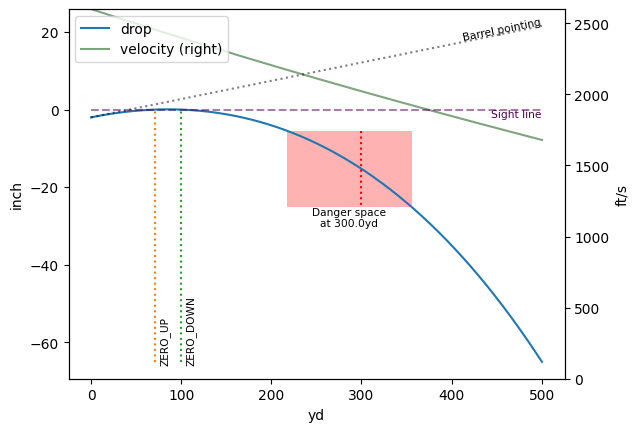

In [3]:
# Plot trajectory out to 500 yards
shot_result = calc.fire(zero, trajectory_range=500, extra_data=True)
ax = shot_result.plot()
# Find danger space for a half-meter tall target at 300 yards
danger_space = shot_result.danger_space(Distance.Yard(300), Distance.Meter(.5), Angular.Mil(0))
print(danger_space)
danger_space.overlay(ax)  # Highlight danger space on the plot
plt.show()

# Zero with Look-Angle

In [4]:
# Now find the elevation needed to hit a target at 200 yards with a 10-degree look-angle
target = Distance.Yard(200)
zero.look_angle = Angular.Degree(10)
high_elevation = calc.set_weapon_zero(shot=zero, zero_distance=target)
print(f'To hit target at look-distance of {target << Set.Units.distance} sighted at a ' 
      f'{zero.look_angle << Angular.Degree} look-angle, barrel elevation={high_elevation << Angular.MOA}')

To hit target at look-distance of 200.0yd sighted at a 10.0° look-angle, barrel elevation=6.4moa


Danger space at 300.0yd for 19.7inch tall target at 10.0° look-angle ranges from 196.667yd to 359.267yd


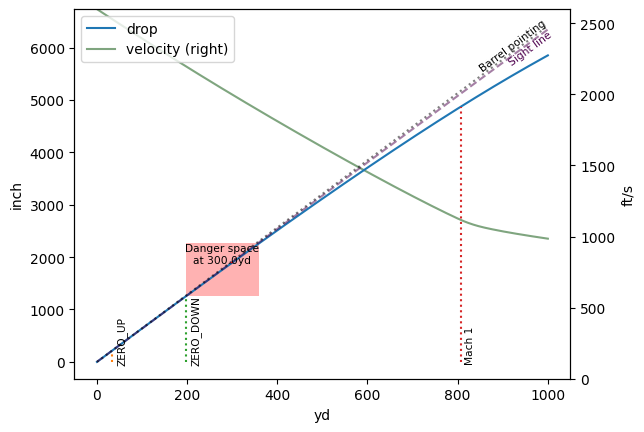

In [5]:
# Plot the trajectory for the new zero
shot_result = calc.fire(zero, trajectory_range=1000, extra_data=True)
ax = shot_result.plot()
# Find danger space for same target size and distance as before
danger_space = shot_result.danger_space(Distance.Yard(300), Distance.Meter(.5), shot_result.shot.look_angle)
print(danger_space)
danger_space.overlay(ax)  # Highlight danger space on the plot
plt.show()

# Print Range Card

In [6]:
# Now shooter prints range card for this new zero, horizontal look-angle
zero.look_angle = 0
shot_result = calc.fire(zero, trajectory_range=1000)
# for p in shot_result:
#     print(p.formatted())
shot_result.dataframe().to_clipboard()
shot_result.dataframe(True)

,time,distance,velocity,mach,drop,drop_adj,windage,windage_adj,angle,energy,ogw,flag
0,0.00 s,0.000 yd,2600.0 ft/s,2.33 mach,-2.0 inch,0.00 mil,0.0 inch,0.00 mil,0.1067 °,2521 ft·lb,744.098 lb,8
1,0.12 s,100.000 yd,2398.1 ft/s,2.15 mach,2.0 inch,0.56 mil,0.1 inch,0.02 mil,0.0180 °,2145 ft·lb,583.866 lb,8
2,0.25 s,200.050 yd,2205.4 ft/s,1.98 mach,-0.1 inch,-0.01 mil,0.3 inch,0.04 mil,-0.0867 °,1814 ft·lb,454.105 lb,8
3,0.39 s,300.050 yd,2022.2 ft/s,1.81 mach,-9.3 inch,-0.88 mil,0.7 inch,0.06 mil,-0.2108 °,1525 ft·lb,350.105 lb,8
4,0.55 s,400.050 yd,1847.5 ft/s,1.65 mach,-27.1 inch,-1.92 mil,1.2 inch,0.08 mil,-0.3590 °,1273 ft·lb,266.955 lb,8
5,0.72 s,500.000 yd,1680.1 ft/s,1.50 mach,-55.0 inch,-3.11 mil,2.0 inch,0.11 mil,-0.5372 °,1053 ft·lb,200.778 lb,8
6,0.91 s,600.000 yd,1519.5 ft/s,1.36 mach,-95.4 inch,-4.50 mil,3.0 inch,0.14 mil,-0.7539 °,861 ft·lb,148.528 lb,8
7,1.11 s,700.000 yd,1366.0 ft/s,1.22 mach,-150.8 inch,-6.10 mil,4.4 inch,0.18 mil,-1.0206 °,696 ft·lb,107.920 lb,8
8,1.35 s,800.000 yd,1221.3 ft/s,1.09 mach,-225.0 inch,-7.96 mil,6.2 inch,0.22 mil,-1.3525 °,556 ft·lb,77.123 lb,8
9,1.61 s,900.000 yd,1093.3 ft/s,0.98 mach,-322.6 inch,-10.14 mil,8.6 inch,0.27 mil,-1.7688 °,446 ft·lb,55.323 lb,8


# Firing Solutions

## Different Distance

In [8]:
# Now shooter is shooting at a 500 yard target, look-angle = 0:
new_target_distance = Distance.Yard(500)
new_target = shot_result.get_at_distance(new_target_distance)
print(f'Zero hits {new_target.drop << Set.Units.drop} at {(new_target.distance << Set.Units.distance)}')
# Shooter looks up adjustment to hit 500 yard target:
hold = new_target.drop_adj
print(f'Sight adjustment to hit {(new_target.distance << Set.Units.distance)} target'
      f' is {(hold << Set.Units.adjustment)}')
# Shooter dials that hold value for a 500-yard shot
zero.relative_angle = Angular(-hold.raw_value, hold.units)
adjusted_result = calc.fire(zero, trajectory_range=1000)
trajectory_adjusted = adjusted_result.get_at_distance(new_target_distance)
print(f'After adjustment: drop at {trajectory_adjusted.distance << Set.Units.distance}'
      f' is {trajectory_adjusted.drop << Set.Units.drop}'
      )

Zero hits -55.0inch at 500.0yd
Sight adjustment to hit 500.0yd target is -3.11mil
After adjustment: drop at 500.0yd is -0.0inch


# Units

In [9]:
from py_ballisticcalc.unit import *

# Ways to define value in units
# 1. old syntax
unit_in_meter = Distance(100, Distance.Meter)
# 2. short syntax by Unit type class
unit_in_meter = Distance.Meter(100)
# 3. by Unit enum class
unit_in_meter = Unit.METER(100)
print(f'100 meters: {unit_in_meter}')
# >>> <Distance>: 100.0 m (3937.0078740157483)

# Convert unit
# 1. by .convert()
unit_in_yards = unit_in_meter.convert(Distance.Yard)
# 2. using shift syntax
unit_in_yards = unit_in_meter << Distance.Yard  # '<<=' operator also supports
# >>> <Distance>: 109.36132983377078 yd (3937.0078740157483)
print(f'100 meters in {unit_in_yards.units.key}: {unit_in_yards}')

# Get value in specified units (as float)
# 1. by .get_in()
value_in_km = unit_in_yards.get_in(Distance.Kilometer)
# 2. by shift syntax
value_in_km = unit_in_yards >> Distance.Kilometer  # '>>=' operator also supports
print(f'100 meters, value in km: {value_in_km}  (value type is {type(value_in_km)})')

# Getting unit raw value (a float)
rvalue = Distance.Meter(100).raw_value
rvalue = float(Distance.Meter(100))
print(f'100 meters in raw value: {rvalue}  (raw type is {type(rvalue)})')

# Comparison operators supported: < > <= >= == !=
print(f'Comparison: {unit_in_meter} == {Distance.Centimeter(100)}: {unit_in_meter == Distance.Centimeter(100)}')  # >>> False, compare two units by raw value
print(f'Comparison: {unit_in_meter} > .1*{unit_in_meter}: {unit_in_meter > .1*unit_in_meter.raw_value}')  # >>> True, compare unit with float by raw value

100 meters: 100.0m
100 meters in yard: 109.361yd
100 meters, value in km: 0.1  (value type is <class 'float'>)
100 meters in raw value: 3937.0078740157483  (raw type is <class 'float'>)
Comparison: 100.0m == 100.0cm: False
Comparison: 100.0m > .1*100.0m: True
